# Kernel PCA


* Non-linear dimensionality reduction through the use of kernels

[Scikit Learn Documentation](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html)

[Scikit Learn Reference](http://scikit-learn.org/stable/auto_examples/decomposition/plot_kernel_pca.html)

This is inspired by this [scikit notebook by Mathieu Blondel and Andreas Mueller](http://scikit-learn.org/stable/auto_examples/decomposition/plot_kernel_pca.html#sphx-glr-auto-examples-decomposition-plot-kernel-pca-py)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style()

In [2]:
from sklearn.datasets import make_circles
from sklearn.decomposition import PCA, KernelPCA

In [3]:
np.random.seed(0)
X, y = make_circles(n_samples=400, factor=.3, noise=.05)

In [4]:
kpca = KernelPCA(kernel="rbf", fit_inverse_transform=True, gamma=10)
X_kpca = kpca.fit_transform(X)
X_back = kpca.inverse_transform(X_kpca)
pca = PCA()
X_pca = pca.fit_transform(X)

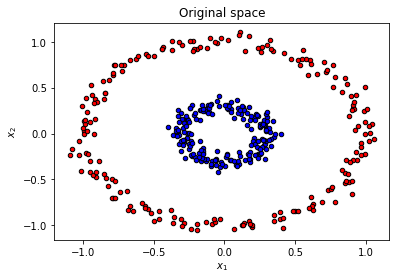

In [5]:
plt.figure()
plt.title("Original space")
reds = y == 0
blues = y == 1

plt.scatter(X[reds, 0], X[reds, 1], c="red", s=20, edgecolor='k')
plt.scatter(X[blues, 0], X[blues, 1], c="blue", s=20, edgecolor='k')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$");

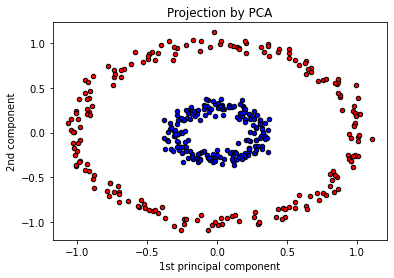

In [6]:
plt.scatter(X_pca[reds, 0], X_pca[reds, 1], c="red", s=20, edgecolor='k')
plt.scatter(X_pca[blues, 0], X_pca[blues, 1], c="blue", s=20, edgecolor='k')
plt.title("Projection by PCA")
plt.xlabel("1st principal component")
plt.ylabel("2nd component");

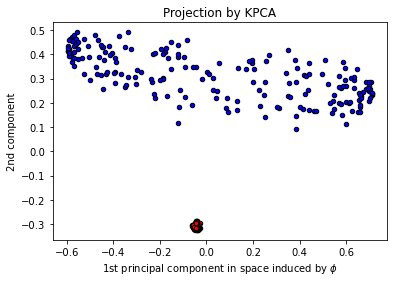

In [7]:
plt.scatter(X_kpca[reds, 0], X_kpca[reds, 1], c="red", s=20, edgecolor='k')
plt.scatter(X_kpca[blues, 0], X_kpca[blues, 1], c="blue", s=20, edgecolor='k')
plt.title("Projection by KPCA")
plt.xlabel("1st principal component in space induced by $\phi$")
plt.ylabel("2nd component");

***

# Kernel PCA Example

In [8]:
df = sns.load_dataset('iris')
df = df[df['species'] != 'setosa']

In [9]:
col = ['petal_length', 'petal_width']
X = df.loc[:, col]
species_to_num = {'versicolor': 0,'virginica': 1}
df['tmp'] = df['species'].map(species_to_num)
y = df['tmp']

In [10]:
kpca = KernelPCA(kernel='rbf', n_components=2)
X_kpca = kpca.fit_transform(X)                 

In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
clf = LogisticRegression()
clf.fit(X, y)

LogisticRegression()

In [13]:
Xv = X.values.reshape(-1,1)
h = 0.02
x_min, x_max = Xv.min(), Xv.max() + 1
y_min, y_max = y.min(), y.max() + 2
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

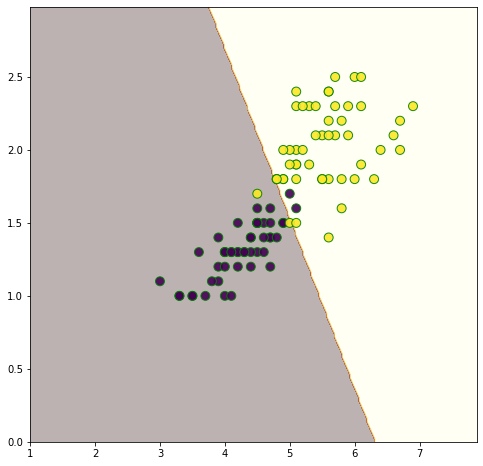

In [14]:
z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
fig = plt.figure(figsize=(8,8))
ax = plt.contourf(xx, yy, z, cmap = 'afmhot', alpha=0.3);
plt.scatter(X.values[:, 0], X.values[:, 1], c=y, s=80, alpha=0.9, edgecolors='g');

In [15]:
clf.fit(X_kpca, y)

LogisticRegression()

In [16]:
Xv = X_kpca
h = 0.02
x_min, x_max = Xv.min()- 0.5, Xv.max() + 0.5
y_min, y_max = y.min() - 0.5, y.max()
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

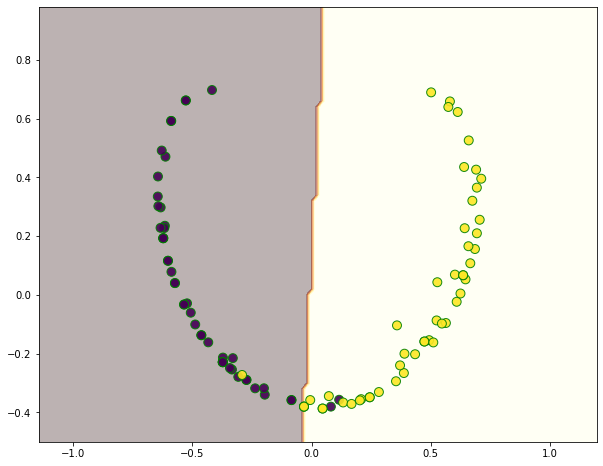

In [17]:
z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
fig = plt.figure(figsize=(10,8))
ax = plt.contourf(xx, yy, z, cmap = 'afmhot', alpha=0.3);
plt.scatter(X_kpca[:,0], X_kpca[:,1], c=y, s=80,  alpha=0.9, edgecolors='g');